In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns

In [4]:
df=pd.read_csv("predictive_maintenance.csv")
df.sample(5)
# Data set has 6 features and one target

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
4921,4922,L52101,L,303.4,312.3,1287,54.8,54,0,No Failure
6604,6605,M21464,M,301.5,310.6,1573,37.4,37,0,No Failure
1125,1126,M15985,M,296.7,307.8,1375,51.4,108,0,No Failure
4508,4509,L51688,L,302.4,310.0,1426,46.6,102,0,No Failure
1815,1816,M16675,M,298.1,307.6,1565,36.3,140,0,No Failure


In [4]:
#understanding the data
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


## 1. EDA (Univariate)

#### Histograms/Distplots/boxplots for Numerical Data

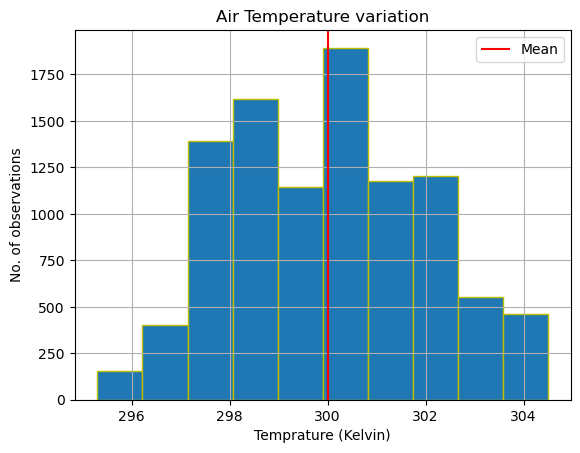

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


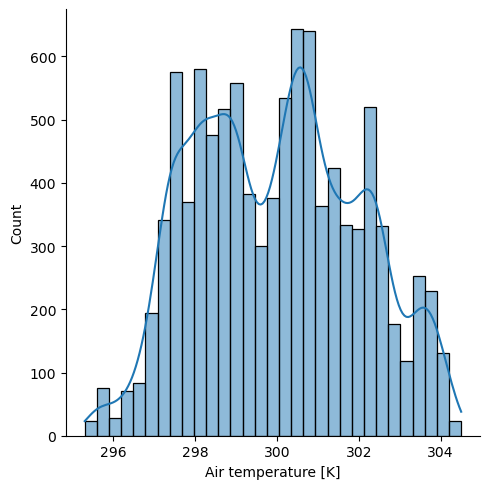

In [5]:
plt.title("Air Temperature variation")
plt.xlabel("Temprature (Kelvin)")
plt.ylabel("No. of observations")
plt.hist(df['Air temperature [K]'],edgecolor='y',align='mid')
plt.axvline(300.00493,color='r',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result :- Data less of normally distributed
sns.displot(df['Air temperature [K]'],kde=True)
plt.show()

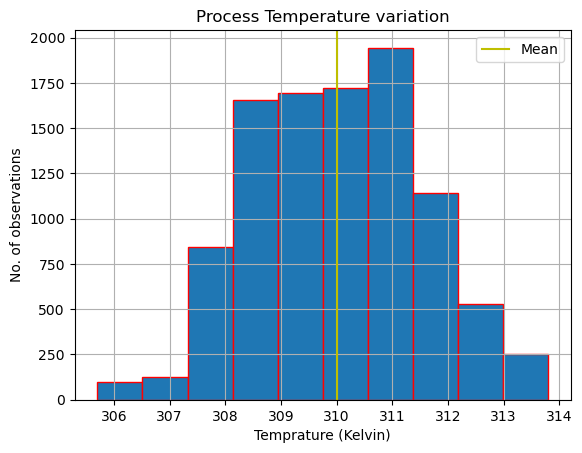

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


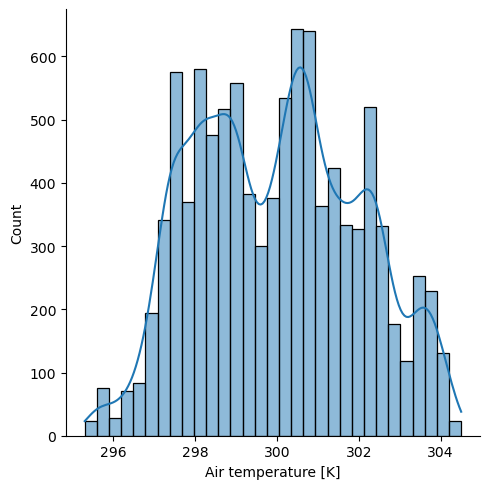

In [6]:
plt.title("Process Temperature variation")
plt.xlabel("Temprature (Kelvin)")
plt.ylabel("No. of observations")
plt.hist(df['Process temperature [K]'],edgecolor='r',align='mid')
plt.axvline(310.00556,color='y',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result data is normally distributed with somewhat normal distribution
sns.displot(df['Air temperature [K]'],kde=True)
plt.show()

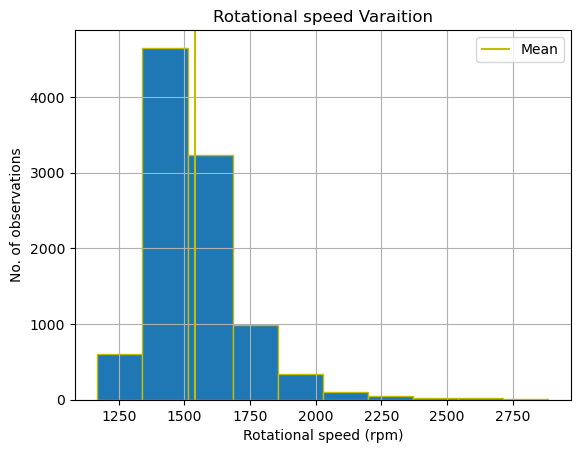

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


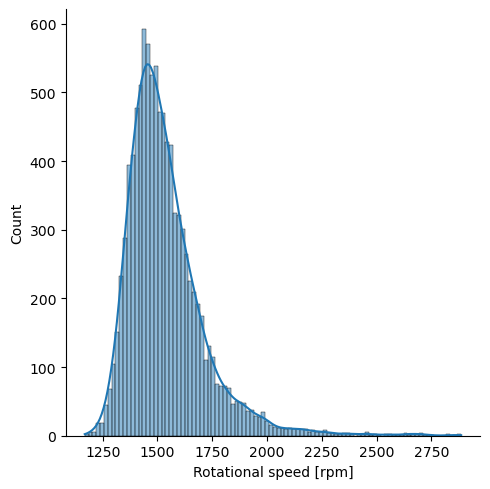

In [7]:
plt.title("Rotational speed Varaition")
plt.xlabel("Rotational speed (rpm)")
plt.ylabel("No. of observations")
plt.hist(df['Rotational speed [rpm]'],edgecolor='y',align='mid')
plt.axvline(1538.7761,color='y',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result :- Data is right skewed 
sns.displot(df['Rotational speed [rpm]'],kde=True)

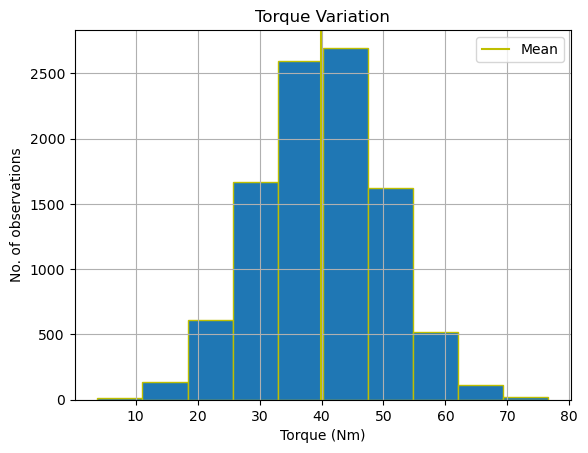

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


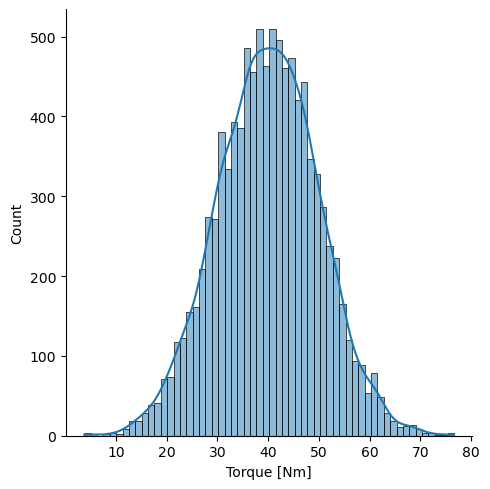

In [8]:
plt.title("Torque Variation")
plt.xlabel("Torque (Nm)")
plt.ylabel("No. of observations")
plt.hist(df['Torque [Nm]'],edgecolor='y',align='mid')
plt.axvline(39.9869,color='y',label='Mean')
plt.grid()
plt.legend() 
plt.show() #Result :- Data is normally distributed
sns.displot(df['Torque [Nm]'],kde=True)

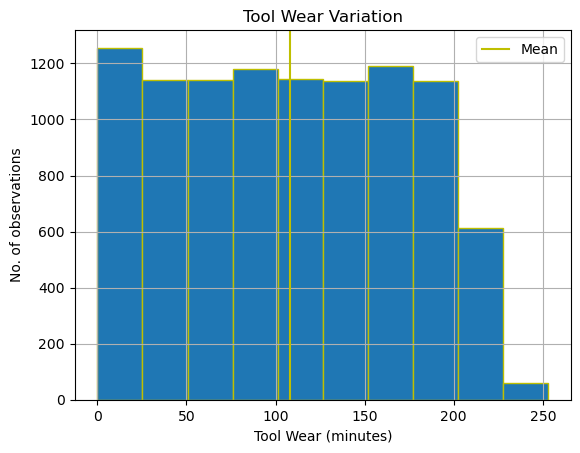

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


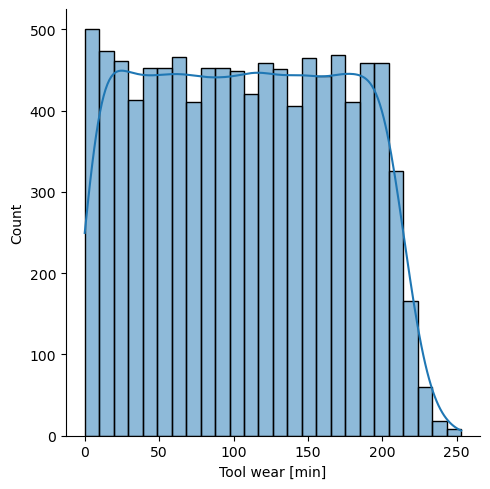

In [9]:
plt.title("Tool Wear Variation")
plt.xlabel("Tool Wear (minutes)")
plt.ylabel("No. of observations")
plt.hist(df['Tool wear [min]'],edgecolor='y',align='mid')
plt.axvline(107.951,color='y',label='Mean')
plt.grid()
plt.legend() 
plt.show() #Result :- Tool Wear timing equally distributed across timeframes
sns.displot(df['Tool wear [min]'],kde=True)

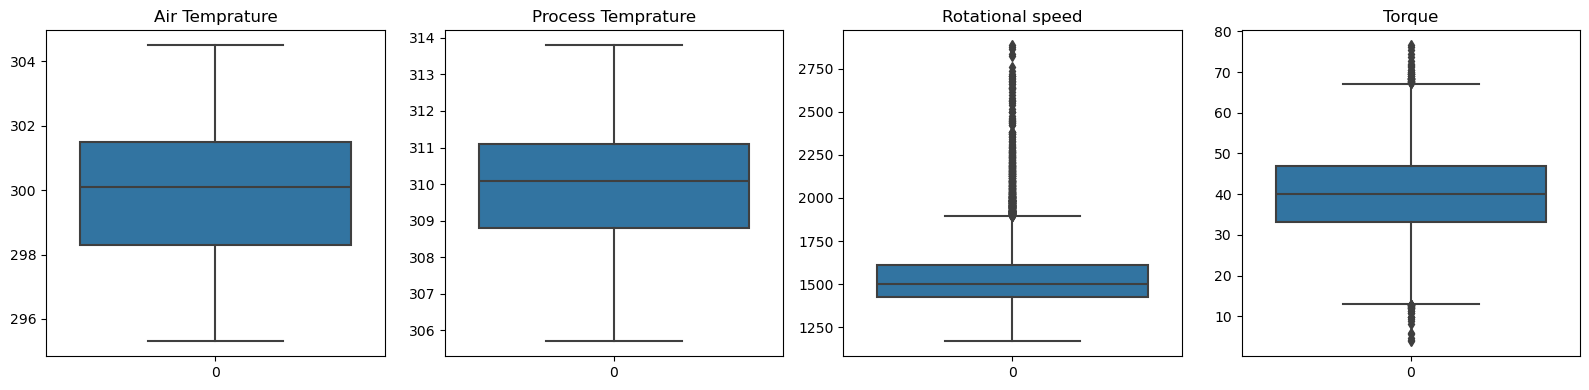

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
sns.boxplot(data=df['Air temperature [K]'], ax=axes[0])
sns.boxplot(data=df['Process temperature [K]'], ax=axes[1])
sns.boxplot(data=df['Rotational speed [rpm]'], ax=axes[2])
sns.boxplot(data=df['Torque [Nm]'], ax=axes[3])

axes[0].set_title('Air Temprature')
axes[1].set_title('Process Temprature')
axes[2].set_title('Rotational speed')
axes[3].set_title('Torque')

plt.tight_layout() 
plt.show()
#Results :- Torque and Rotational speed need Outlier processing

#### Categorical data analysis for column 'Type'

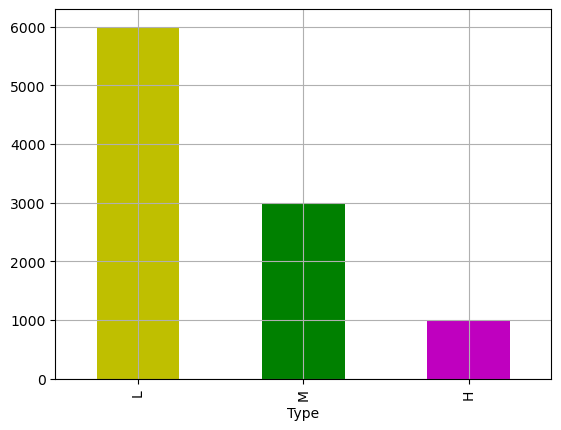

In [11]:
df['Type'].value_counts().plot(kind='bar',color=['y','g','m'])
plt.grid()
plt.show()

<Axes: ylabel='count'>

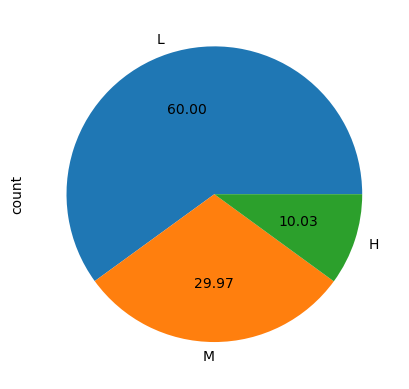

In [12]:
df['Type'].value_counts().plot(kind='pie',autopct='%.2f')

## 2. EDA (Multivariate)

C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

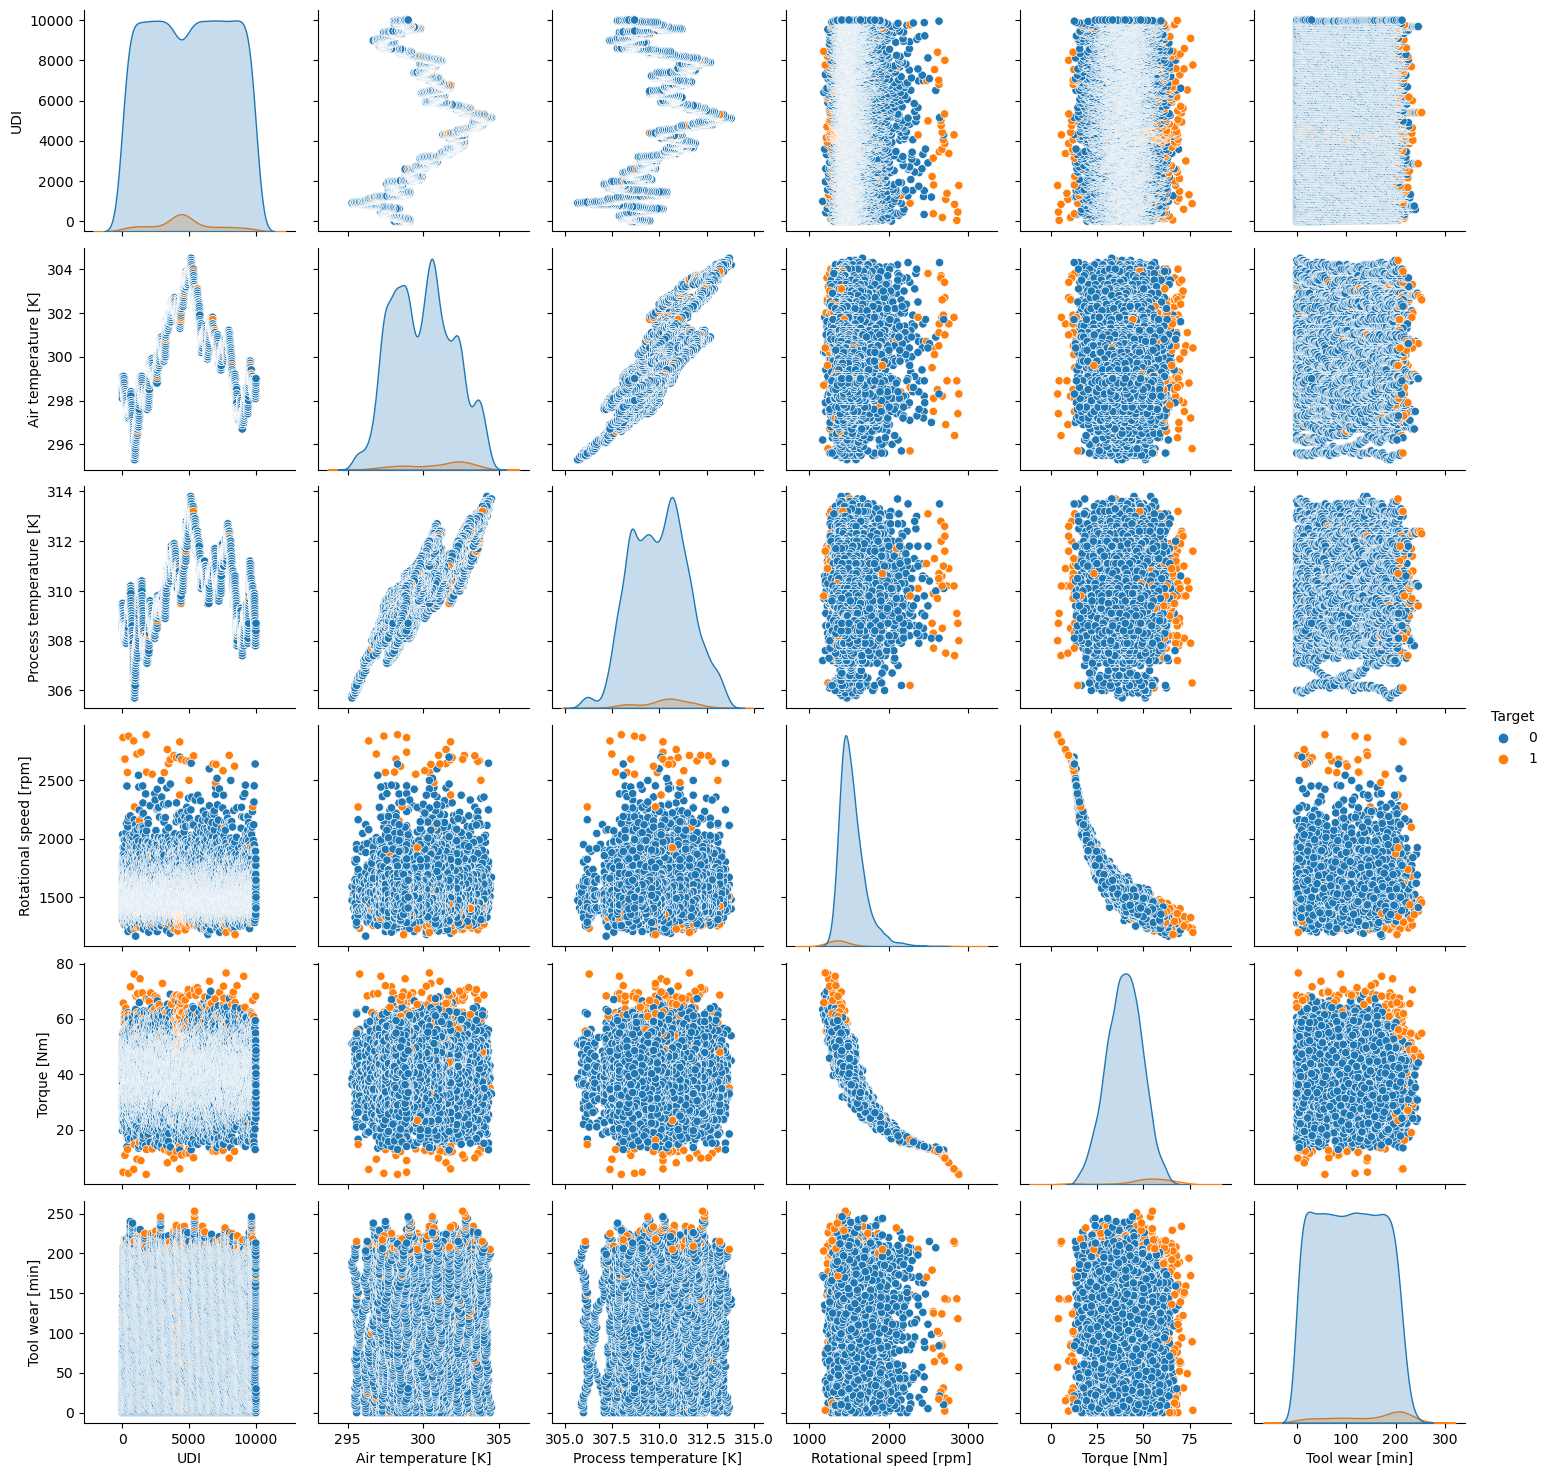

In [5]:
sns.pairplot(df, hue='Target')
plt.show()

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\2231670728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Air temperature [K]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\2231670728.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

<Axes: xlabel='Air temperature [K]', ylabel='Density'>

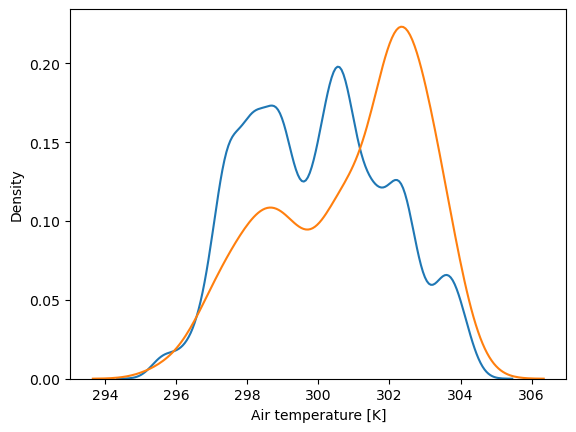

In [14]:
sns.distplot(df[df['Target']==0]['Air temperature [K]'],hist=False)
sns.distplot(df[df['Target']==1]['Air temperature [K]'],hist=False)
#Result= More chances of Failure at Higher Air Temprature

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\2053490297.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Process temperature [K]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\2053490297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

<Axes: xlabel='Process temperature [K]', ylabel='Density'>

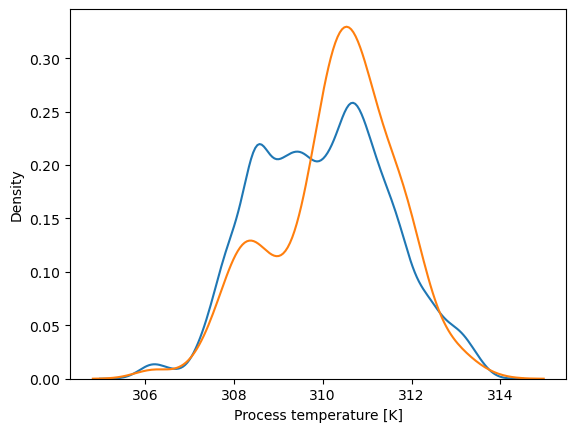

In [15]:
sns.distplot(df[df['Target']==0]['Process temperature [K]'],hist=False)
sns.distplot(df[df['Target']==1]['Process temperature [K]'],hist=False)
#Result=Higher chances of failure at Higher tempratures

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\1369393909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Rotational speed [rpm]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\1369393909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `di

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

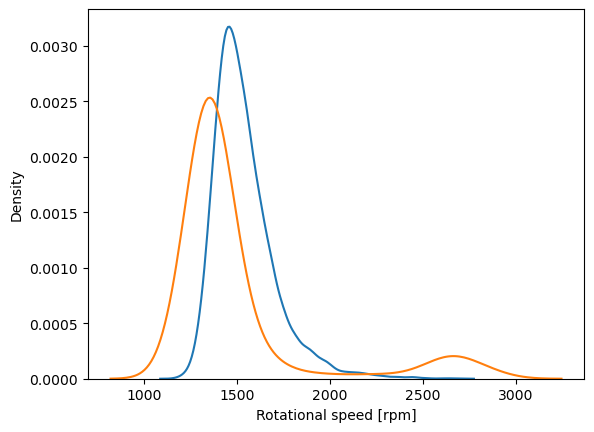

In [16]:
sns.distplot(df[df['Target']==0]['Rotational speed [rpm]'],hist=False)
sns.distplot(df[df['Target']==1]['Rotational speed [rpm]'],hist=False)
#Result = Lower Rotational Speeds -> More chances of failure

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\3262717936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Torque [Nm]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\3262717936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a f

<Axes: xlabel='Torque [Nm]', ylabel='Density'>

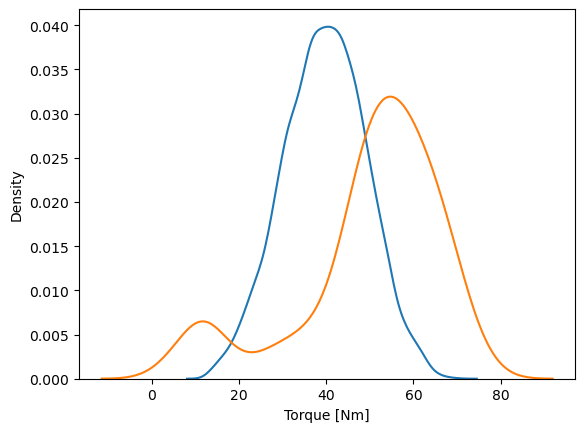

In [17]:
sns.distplot(df[df['Target']==0]['Torque [Nm]'],hist=False)
sns.distplot(df[df['Target']==1]['Torque [Nm]'],hist=False)
#Result= More Rotational speeds -> More chances of failure 

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\1646557087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0]['Tool wear [min]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\1646557087.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

<Axes: xlabel='Tool wear [min]', ylabel='Density'>

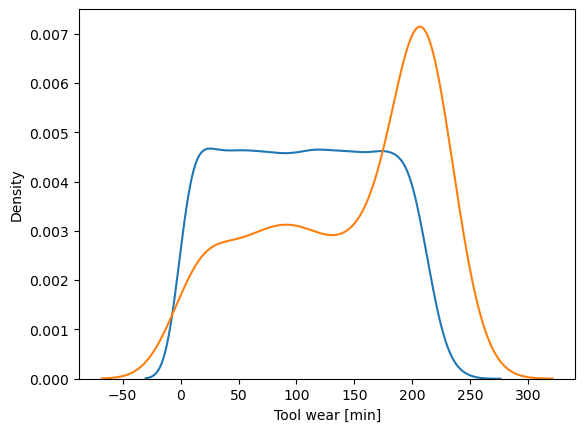

In [18]:
sns.distplot(df[df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Target']==1]['Tool wear [min]'],hist=False)

In [19]:
#Checking skewness of the dataset columns
print('Skewness score of Air Temperature :-',df['Air temperature [K]'].skew())
print('Skewness score of Air Process temperature [K] :-',df['Process temperature [K]'].skew())
print('Skewness score of Rotational speed [rpm] :-',df['Rotational speed [rpm]'].skew())
print('Skewness score of Torque [Nm] :-',df['Torque [Nm]'].skew())


Skewness score of Air Temperature :- 0.11427392052155042
Skewness score of Air Process temperature [K] :- 0.015027267769228572
Skewness score of Rotational speed [rpm] :- 1.9931710047137523
Skewness score of Torque [Nm] :- -0.00951659584005855


Results:-
1. Scaling and Log transformation required for Rotational speed.

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\3228990633.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df[df['Type']=='L'][df['Target']==1]['Tool wear [min]'],hist=False)
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_22296\3228990633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Type']=='L'][df['Target']==1]['Tool wear [min]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_

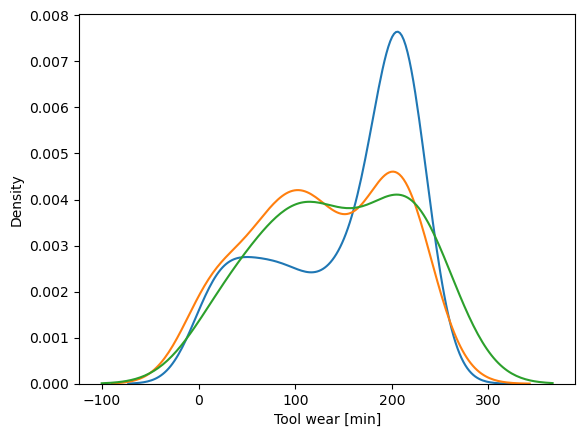

In [20]:
#sns.distplot(df[df['Type']=='L'][df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Type']=='L'][df['Target']==1]['Tool wear [min]'],hist=False)
#sns.distplot(df[df['Type']=='M'][df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Type']=='M'][df['Target']==1]['Tool wear [min]'],hist=False)
#sns.distplot(df[df['Type']=='H'][df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Type']=='H'][df['Target']==1]['Tool wear [min]'],hist=False)
plt.show()

Lower the Type quality, higher the chances of failure of the machinary.

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_20768\2208973225.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df[df['Type']=='L'][df['Target']==1]['Air temperature [K]'],hist=False)
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_20768\2208973225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Type']=='L'][df['Target']==1]['Air temperature [K]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd

<Axes: xlabel='Air temperature [K]', ylabel='Density'>

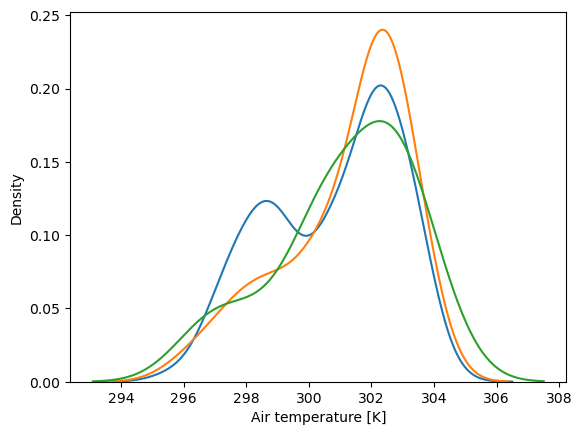

In [8]:
sns.distplot(df[df['Type']=='L'][df['Target']==1]['Air temperature [K]'],hist=False)
#sns.distplot(df[df['Type']=='M'][df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Type']=='M'][df['Target']==1]['Air temperature [K]'],hist=False)
# #sns.distplot(df[df['Type']=='H'][df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Type']=='H'][df['Target']==1]['Air temperature [K]'],hist=False)
# plt.show()

C:\Users\Vatsal\AppData\Local\Temp\ipykernel_20768\744088993.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df[df['Type']=='L'][df['Target']==1]['Rotational speed [rpm]'],hist=False)
C:\Users\Vatsal\AppData\Local\Temp\ipykernel_20768\744088993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Type']=='L'][df['Target']==1]['Rotational speed [rpm]'],hist=False)
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wit

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

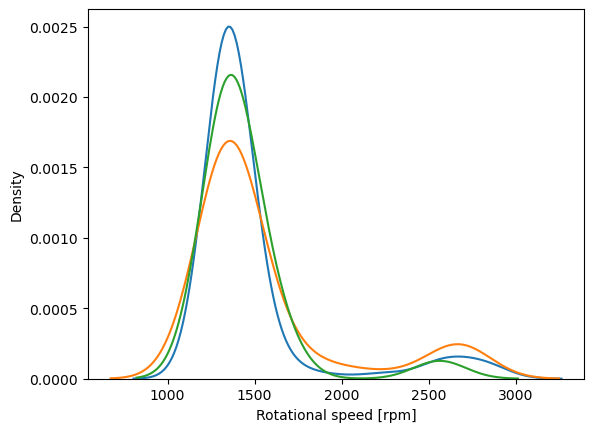

In [9]:
sns.distplot(df[df['Type']=='L'][df['Target']==1]['Rotational speed [rpm]'],hist=False)
#sns.distplot(df[df['Type']=='M'][df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Type']=='M'][df['Target']==1]['Rotational speed [rpm]'],hist=False)
# #sns.distplot(df[df['Type']=='H'][df['Target']==0]['Tool wear [min]'],hist=False)
sns.distplot(df[df['Type']=='H'][df['Target']==1]['Rotational speed [rpm]'],hist=False)
# plt.show()

<Axes: xlabel='Target'>

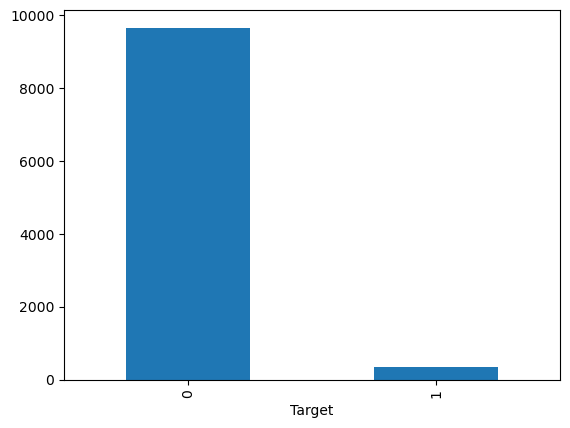

In [10]:
df['Target'].value_counts().plot(kind='bar')  # Check if the target class is imbalanced


C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


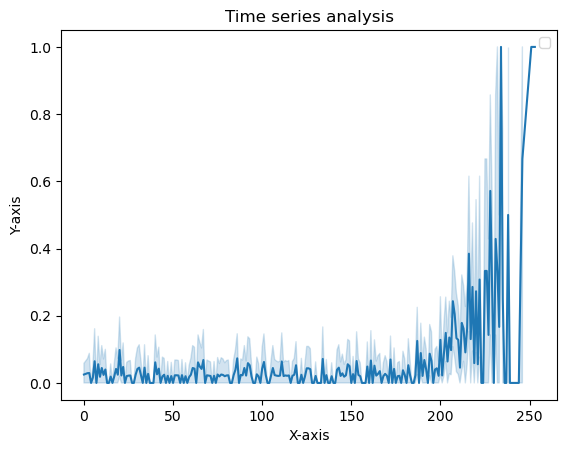

In [6]:
sns.lineplot(x='Tool wear [min]', y='Target', data=df)

# Customize the plot (optional)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Time series analysis')
plt.legend()
plt.show()